[Article Refereed](https://www.analyticsvidhya.com/blog/2019/10/regime-shift-models-time-series-modeling-financial-markets/)

#### **Regime Shift Models** 
Regime shift models address this gap in basic time series modelling by segregating the time series into different “states”. These models are also widely known as state-space models in time series literature.

##### **Three types of models that are popularly used**
---------------------------------------------
- #### Threshold models

In [111]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import math

In [112]:
data = pd.read_csv("nifty.csv")
data

,Date,Close,Open,High,Low,Vol.,Change %
0,2002-04-01,1138.95,1129.85,1143.30,1129.85,41.46M,0.83%
1,2003-04-01,984.30,977.40,992.05,973.50,50.07M,0.62%
2,2004-04-01,1819.65,1771.45,1823.05,1771.45,111.07M,2.69%
3,2005-04-01,2067.65,2035.90,2071.20,2024.25,63.21M,1.57%
4,2008-04-01,4739.55,4735.65,4800.75,4628.75,119.88M,0.11%
...,...,...,...,...,...,...,...
4916,2013-09-30,5735.30,5801.05,5810.20,5718.50,155.68M,-1.68%
4917,2014-09-30,7964.80,7948.80,8030.90,7923.85,141.14M,0.07%
4918,2015-09-30,7948.90,7924.25,7957.70,7874.50,217.19M,1.35%
4919,2016-09-30,8611.15,8581.50,8637.15,8555.20,187.33M,0.23%


In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4921 entries, 0 to 4920
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      4921 non-null   object 
 1   Close     4921 non-null   float64
 2   Open      4921 non-null   float64
 3   High      4921 non-null   float64
 4   Low       4921 non-null   float64
 5   Vol.      4921 non-null   object 
 6   Change %  4921 non-null   object 
dtypes: float64(4), object(3)
memory usage: 269.2+ KB


In [114]:
df_threshold = data.copy()
df_threshold.Date = pd.to_datetime(df_threshold.Date, format='%Y/%m/%d')

In [115]:
df_threshold.set_index(df_threshold.Date, inplace= True)
df_threshold.sort_index(inplace= True)

In [116]:
df_threshold.drop(columns= ['Date', 'Change %', 'Vol.'] , inplace= True)

In [117]:
df_threshold['MA_200'] = df_threshold.Close.rolling(200).mean()

In [118]:
df_threshold.dropna(inplace=True)
df_threshold

,Close,Open,High,Low,MA_200
Date,,,,,
2000-10-19,1166.15,1135.65,1171.50,1108.20,1459.62625
2000-10-20,1172.00,1166.20,1202.70,1166.20,1457.52525
2000-10-23,1143.95,1171.75,1172.15,1141.45,1455.05150
2000-10-24,1152.45,1143.00,1155.35,1132.90,1452.83475
2000-10-25,1183.90,1158.20,1190.40,1157.25,1450.66625
...,...,...,...,...,...
2019-10-09,11313.30,11152.95,11321.60,11090.15,11266.66550
2019-10-10,11234.55,11280.50,11293.35,11208.55,11268.81100
2019-10-11,11305.05,11257.70,11362.90,11189.40,11270.89450


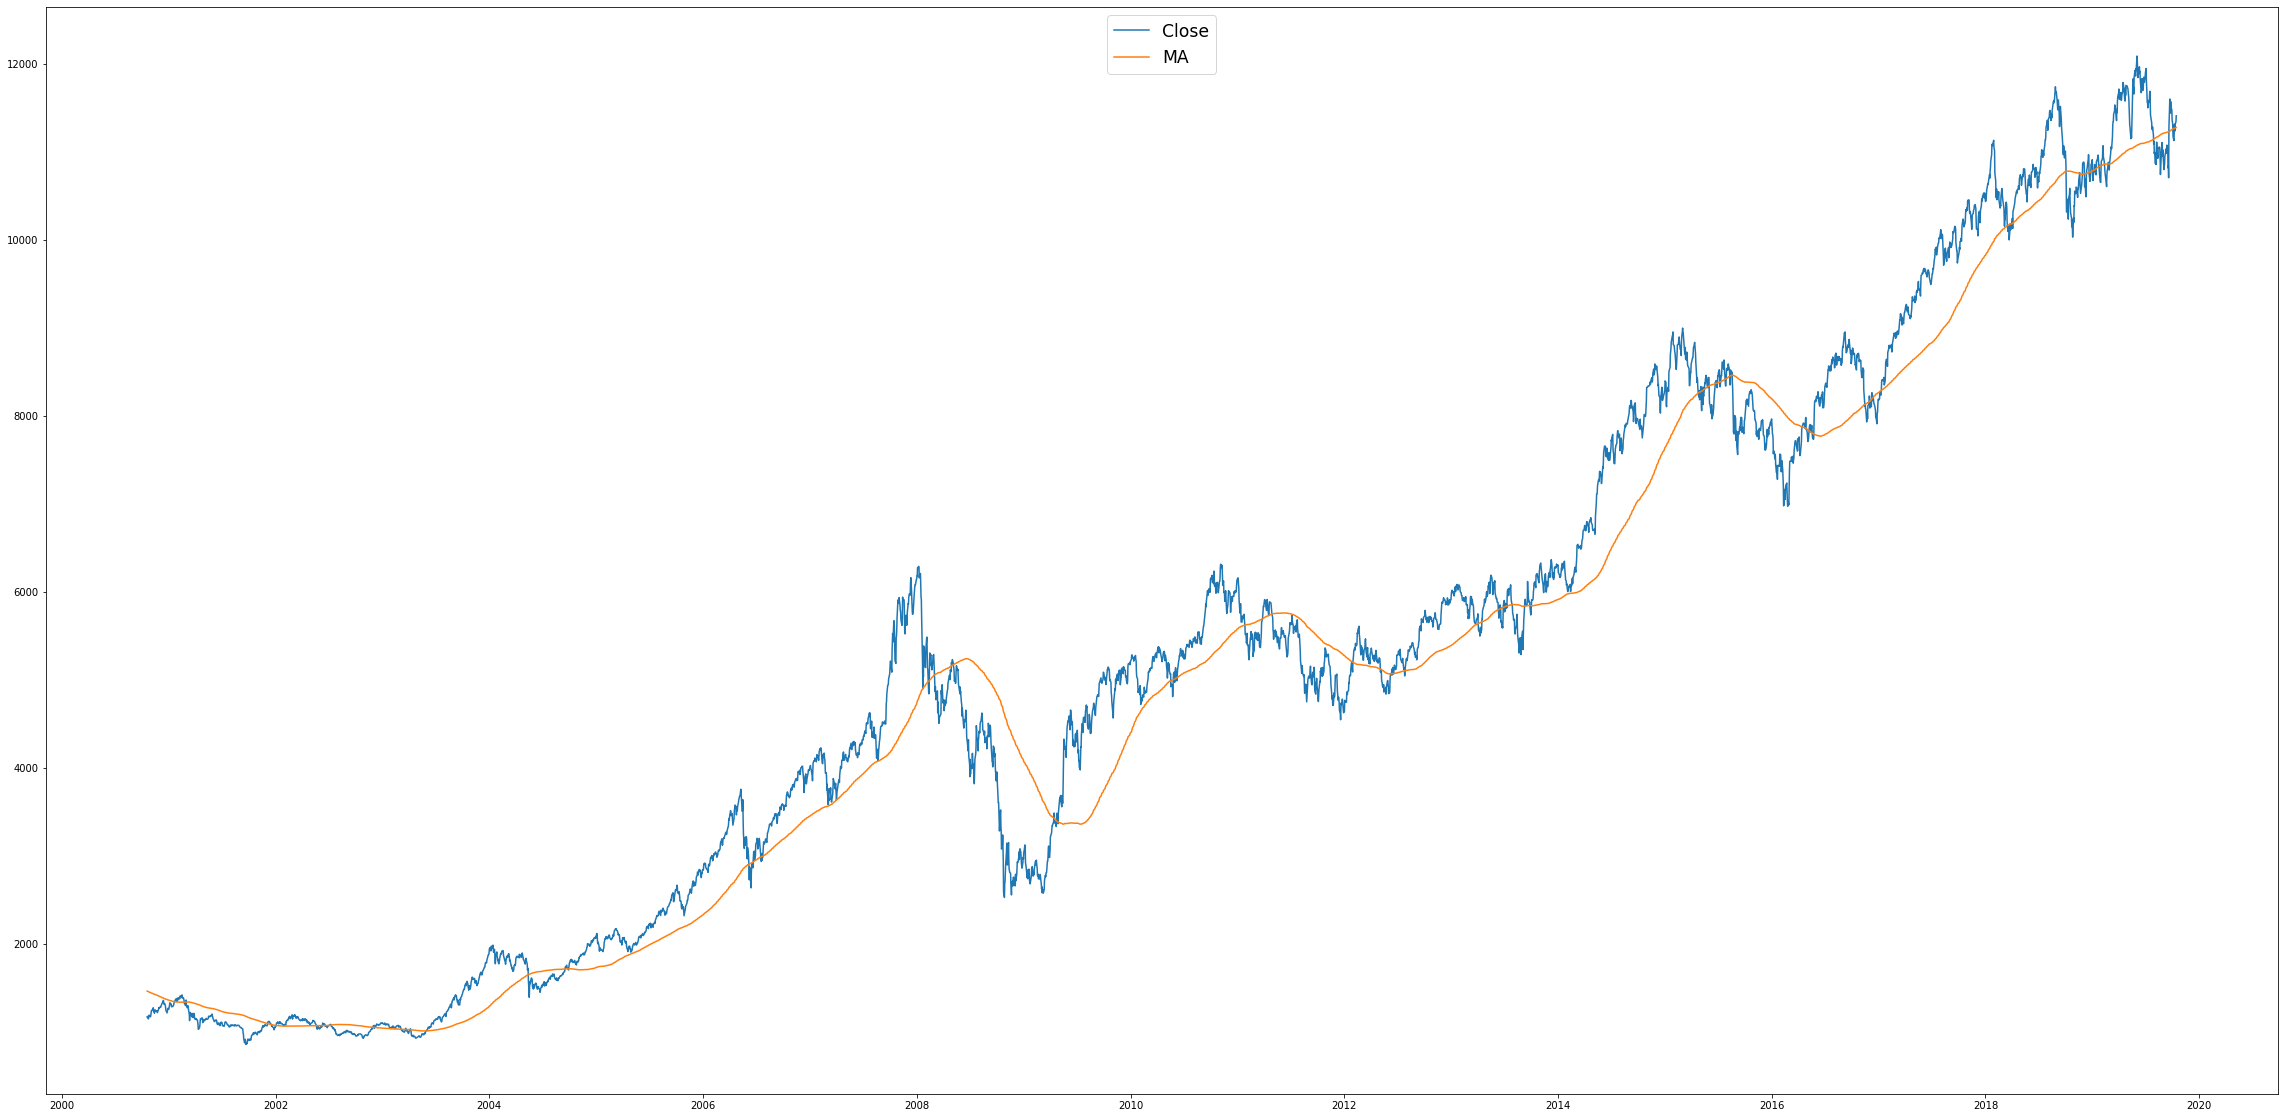

In [119]:
plt.figure(figsize=(40,20))
plt.plot(df_threshold.Close, label = 'Close')
plt.plot(df_threshold.MA_200, label = 'MA')
plt.legend(loc = 'upper center', fontsize = 'xx-large')

------------------------------

- #### Predictive models

In [208]:
data1 = data.copy()
data1.Date = pd.to_datetime(data1.Date, format='%Y/%m/%d')
data1.set_index(data1.Date, inplace= True)
data1.sort_index(inplace= True)
data1.drop(columns= ['Date', 'Change %', 'Vol.'] , inplace= True)

In [209]:
train_data, test_data = data1[0:int(len(data)*0.9)], data1[int(len(data)*0.9):]

In [210]:
train = train_data.filter(['Close']).values # selecting open prices

In [211]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
trainscaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train) 

In [212]:
timesteps = 7
X_train = []
y_train = []
for i in range(timesteps, train.shape[0]):
    X_train.append(train_scaled[i-timesteps:i, 0]) # we take 30 previous prices
    y_train.append(train_scaled[i, 0]) # and 60-th price as y value
X_train, y_train = np.array(X_train), np.array(y_train)

In [213]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [214]:
from keras.models import Sequential
from keras.layers import Dense, LSTM , Dropout

model = Sequential()
# Adding the first LSTM layer 
# Here return_sequences=True means whether to return the last output in the output sequence, or the full sequence.
# it basically tells us that there is another(or more) LSTM layer ahead in the network.
# model.add(LSTM(units = 128, return_sequences = True, input_shape = (X_train.shape[1], 1)))
# # Dropout regularisation for tackling overfitting
# model.add(Dropout(0.20))

# model.add(LSTM(units = 64, return_sequences = True))
# model.add(Dropout(0.25))

# model.add(LSTM(units = 40, return_sequences = True))
# model.add(Dropout(0.2))

# model.add(LSTM(units = 20))
# model.add(Dropout(0.25))

# # Adding the output layer
# model.add(Dense(units = 1))
model.add (LSTM (80, return_sequences= True, input_shape= (X_train.shape[1], 1 )))
model.add (LSTM (80, return_sequences= False))
model.add(Dense(20))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 40, batch_size = 32)

Epoch 1/40
139/139 [==============================] - 5s 12ms/step - loss: 0.0084
Epoch 2/40
139/139 [==============================] - 2s 13ms/step - loss: 1.6477e-04
Epoch 3/40
139/139 [==============================] - 2s 14ms/step - loss: 1.5377e-04
Epoch 4/40
139/139 [==============================] - 2s 13ms/step - loss: 1.6523e-04
Epoch 5/40
139/139 [==============================] - 2s 14ms/step - loss: 1.6110e-04
Epoch 6/40
139/139 [==============================] - 2s 14ms/step - loss: 1.6663e-04
Epoch 7/40
139/139 [==============================] - 2s 12ms/step - loss: 1.5794e-04
Epoch 8/40
139/139 [==============================] - 2s 12ms/step - loss: 1.8304e-04
Epoch 9/40
139/139 [==============================] - 2s 12ms/step - loss: 1.5316e-04
Epoch 10/40
139/139 [==============================] - 2s 12ms/step - loss: 1.5796e-04
Epoch 11/40
139/139 [==============================] - 1s 10ms/step - loss: 1.6470e-04
Epoch 12/40
139/139 [==============================] - 2

In [215]:
real_stock_price = test_data.filter(['Close']).values # taking open price

In [216]:
combine = pd.concat((train_data['Close'], test_data['Close']), axis = 0)
# our test inputs also contains stock open Prices of last timesteps dates (as described above)
test_inputs = combine[len(combine) - len(test_data) - timesteps:].values
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

In [217]:
test_data.shape

(493, 4)

In [218]:
# same steps as we followed while processing training data
X_test = []
for i in range(timesteps, test_data.shape[0]+timesteps):
    X_test.append(test_inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
# inverse_transform because prediction is done on scaled inputs
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

16/16 [==============================] - 2s 6ms/step


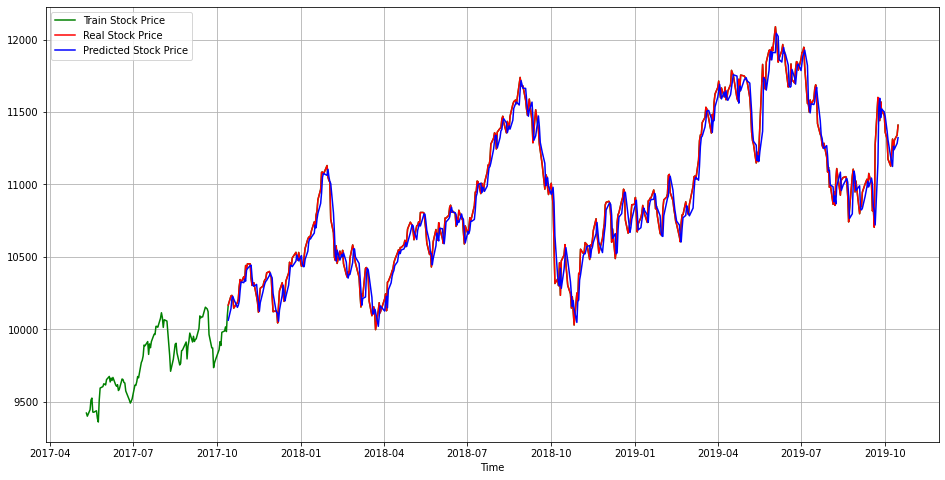

MSE: 9099.917887914404
RMSE: 95.39348975645248


In [219]:
plt.figure(figsize=(16,8))
plt.plot(data1.index[-600:], data1['Close'].tail(600), color='green', label = 'Train Stock Price')
plt.plot(test_data.index, real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.xlabel('Time')
plt.legend()
plt.grid(True)
plt.show()

mse = mean_squared_error(real_stock_price, predicted_stock_price)
print('MSE: '+str(mse))
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print('RMSE: '+str(rmse))

----------------------------------------------------------------------------------------------------------------------------------------------------------------

- #### Markov Switching **Autoregressive Model**

In [235]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Weekly returns'}, xlabel='Date'>

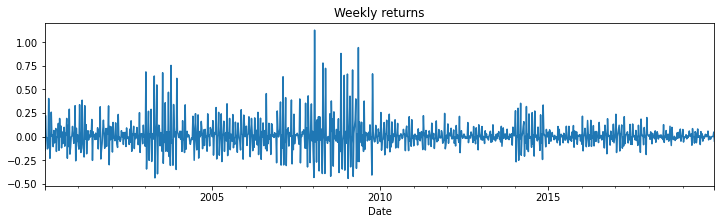

In [468]:
nifty = pd.read_csv('nifty_main.csv', index_col=0, parse_dates=True)['Nifty']# Get nifty prices
nifty_ret = nifty.resample('W').last().pct_change().dropna()# Get weekly returns
nifty_ret.plot(title='Weekly returns', figsize=(12, 3)) # Plot the dataset

In [469]:
adfuller(nifty_ret.dropna())

(-4.120136815249779,
 0.0008969007860871993,
 21,
 1019,
 {'1%': -3.436783610904024,
  '5%': -2.864380523665108,
  '10%': -2.568282420632131},
 -1695.0547409456608)

In [470]:
mod_kns = sm.tsa.MarkovRegression(nifty_ret.dropna(), k_regimes=3, trend='nc', switching_variance=True)
res_kns = mod_kns.fit()
res_kns.summary()

c:\Users\Yash\.conda\envs\basic\lib\site-packages\statsmodels\tsa\tsatools.py:824: FutureWarning: trend 'nc' has been renamed to 'n' after 0.14 is released. Use 'n' now to avoid this warning.
  FutureWarning,


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                  Nifty   No. Observations:                 1041
Model:               MarkovRegression   Log Likelihood                 791.848
Date:                Mon, 11 Jul 2022   AIC                          -1565.696
Time:                        19:02:50   BIC                          -1521.165
Sample:                    01-09-2000   HQIC                         -1548.804
                         - 12-15-2019                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0007      0.000      4.341      0.000       0.000       0.001
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0180      0.002      9.404      0.000       0.014       0.022
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0984      0.014      6.930      0.000       0.071       0.126
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.5550      0.055     10.005      0.000       0.446       0.664
p[1->0]        0.3253      0.037      8.733      0.000       0.252       0.398
p[2->0]        0.0589      0.054      1.089      0.276      -0.047       0.165
p[0->1]        0.4302      0.060      7.221      0.000       0.313       0.547
p[1->1]        0.6667      0.037     18.022      0.000       0.594       0.739
p[2->1]        0.0011      0.042      0.025      0.980      -0.081       0.084
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

Below we plot the probabilities of being in each of the regimes; only in a few periods is a high-variance regime probable.

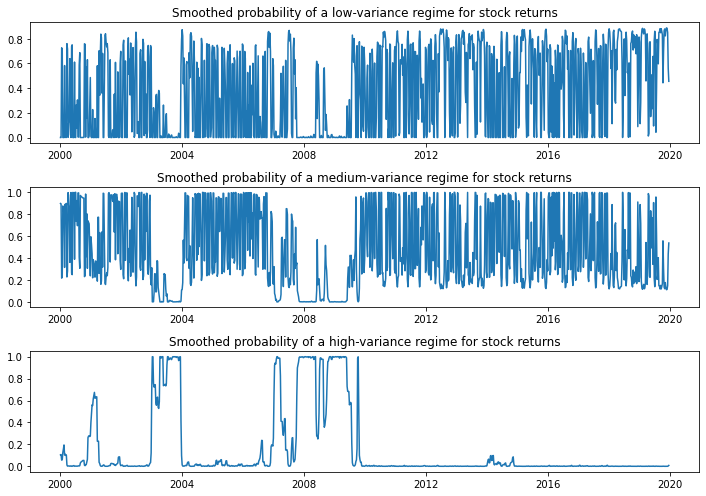

In [471]:
fig, axes = plt.subplots(3, figsize=(10,7))
ax = axes[0]
ax.plot(res_kns.smoothed_marginal_probabilities[0])
ax.set(title='Smoothed probability of a low-variance regime for stock returns')
ax = axes[1]
ax.plot(res_kns.smoothed_marginal_probabilities[1])
ax.set(title='Smoothed probability of a medium-variance regime for stock returns')
ax = axes[2]
ax.plot(res_kns.smoothed_marginal_probabilities[2])
ax.set(title='Smoothed probability of a high-variance regime for stock returns')
fig.tight_layout()

In [472]:
print(res_kns.expected_durations)

[ 2.24722463  3.00035671 16.68873893]


- This Model is fit via maximum likelihood estimation. Under the hood, good starting parameters are found using a number of steps of the expectation maximization (EM) algorithm, and a quasi-Newton (BFGS) algorithm is applied to quickly find the maximum.
- Smoothed refers to an estimate of the probability at time t using all the data in the sample
- This model involves multiple structures that can characterize the time series behaviours in different regimes or states or episodes. By permitting switching between these structures, this model is able to capture more complex and dynamic patterns.

#### Conclusion :
- In financial market It can help us to build trading strategy and adapt our risk appetite accordingly.
- asset prices and market crashes risk can be indentified because model which is totally based on current state of market.